In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('../data/MERGED_DATA_INTERPOLATED_UPDATED.xlsx', sheet_name='Sheet1')
df.head()

,LOC_CODE,DATUM,TIJD,ZS [mg/l],ZICHT [dm],T [oC],SiO2 [umol/L],SALNTT [DIMSLS],PO4 [umol/L],pH [DIMSLS],...,Pde,Plo,Dpu,Rte,Fja,Hak,Mhe,Dno,Dat,interpolated_columns
0,DANTZGT,1990-01-10,15:00:00,135.0,2.0,4.0,20.178571,29.19,1.645161,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,DANTZGT,1990-02-06,13:40:00,295.0,0.5,6.0,19.803571,27.37,1.177419,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['SiO2 [umol/L]', 'PO4 [umol/L]', 'pH [DIMSLS]..."
2,DANTZGT,1990-03-08,13:45:00,103.0,3.0,7.3,19.428571,24.99,0.709677,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,DANTZGT,1990-04-04,10:00:00,113.0,3.0,8.2,6.285714,28.79,0.806452,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,DANTZGT,1990-05-09,15:30:00,20.0,11.0,17.4,1.714286,33.28,1.161290,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [11]:
feature_vecs = []
species = df.columns[25:-2].to_list()

for specie in species:
    f_tot = df.loc[~df[specie].isnull()].copy()
    f_tot.drop(columns=f_tot.columns[24:], inplace=True)
    f_tot.drop(columns=["LOC_CODE", "DATUM", "TIJD"], inplace=True)
    f = f_tot.mean().to_list()
    feature_vecs.append(f)

feature_vecs = np.array(feature_vecs)

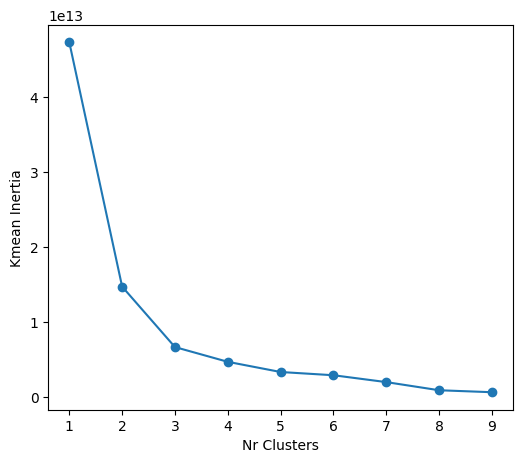

In [12]:
def plot_inertia(nr_clusters_limit):
    inertia_list = []

    for nr_clusters in range(1, nr_clusters_limit):
        kmeans = KMeans(n_clusters=nr_clusters, random_state=0)
        kmeans.fit(feature_vecs)
        inertia_list.append(kmeans.inertia_)

    fig = plt.figure(figsize=(6, 5))

    plt.plot(range(1, nr_clusters_limit), inertia_list, marker='o')
    plt.xlabel('Nr Clusters')
    plt.ylabel('Kmean Inertia')

plot_inertia(10)

[ 461608.17611727  551962.31316557  745445.7663953   823198.42336829
  592059.1593907  2054895.04049867  761803.82746385  705186.1617169
  571990.17916926  592088.30953213  407249.61811212  739776.9979715
  993591.34870114  381706.93729734 1050482.45174752  378577.60395018
  711923.62881521  763603.6768838   931659.54956962  347302.23956525
  713393.87062676  417144.16224389  325698.31360422  665375.26617737
  792878.31496716 1129222.51935229  596999.70797651  939593.80690451
  534802.28965245  511200.43620863  905625.86520524  504325.41206948]
[-283.94264509  133.0910433  -163.14194642  200.24177141  -22.2626528
 -265.45302008  -55.67084293  -51.38314247   79.77063116 -294.60176215
  171.41291803    0.48873124 -101.00807051 -228.25677882   61.15308857
  -25.88655271  103.84131029]
[  4.16173472   1.58021174  11.45284529   1.58009122   7.46258941
 -12.52222125 -10.95976758 -31.12510174  -5.11093388   7.10419182
 -20.65378963   7.82670974   6.00870688  80.22374191 121.46992761
 168.1279

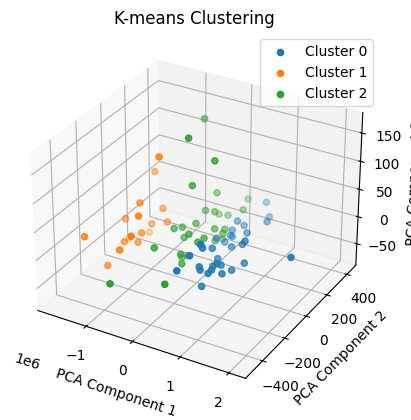

In [13]:
# Seems optimal given the elbow graph above.
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(feature_vecs)
labels = kmeans.labels_

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(feature_vecs)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(reduced_features[labels == i, 0], reduced_features[labels == i, 1], reduced_features[labels == i, 2], label=f'Cluster {i}')

print(f"{reduced_features[labels == 0, 0]}")
print(f"{reduced_features[labels == 1, 1]}")
print(f"{reduced_features[labels == 2, 2]}")

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()

plt.title('K-means Clustering')
plt.show()